***
# **M1MAO -- M1 MF FES 2021/2022 -- Université Paris-Saclay**
***

In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## TP 05 bis

## 1. Conditions aux limites mixtes.

Soit maintenant $p>0$ et considérons le problème 

$$
(\tilde{P})\left\{\begin{aligned}
&-u''(x)+u(x)=f(x),\ x\in ]0,1[,\\
&u(0)=0,\ u'(1)+pu(1)=0.
\end{aligned}
\right.
$$

**Q1)** Ecrire la formulation variationnelle de $\tilde{P}$ dans l'espace 
$$ 
\tilde{V} = \left\{ v \in L^2(]0,1[)\,:\, v' \in L^2(]0,1[),\ 
v(0)=0 \right\}.
$$

Pour approcher le problème $\tilde{P}$ on considère, avec les mêmes notations qu'avant, l'espace 
$$ 
\tilde{V}_h \ = \left \{ v_h \in C^0([0,1])\,\,:\,\ v_h\ \textrm{est affine sur } {[x_i,x_{i+1}]}  \textrm{ et } v_h(0)=0 \right \}.
$$

L'espace $\tilde{V}_h$ est un espace de dimension finie $n+1$ dont une base est constituée des fonctions $\varphi_i,$  $i=1,\dots,n+1,$ avec  $\varphi_{n+1}$ la fonction continue, affine sur $[x_i,x_{i+1}],$ pour tout $i,$ tel que $\varphi_{n+1}(x_{n+1})=1,\ \varphi_{n+1}(x_i)=0,\ $ pour $i=1,\dots,n.$

**Q2)**Écrire le problème variationnel discret associé à la formulation variationnelle trouvée dans **Q1**. Ecrire un programme donnant la solution approchée de $\tilde{P}$ dans le cas $p=1,$ $f=(\pi^2+1)\sin(\pi x)+\frac{\pi}{2}x,$ pour lequel la solution exacte de $\tilde{P}$ est donnée par $u(x)=\sin(\pi x)+\frac{\pi}{2}x.$ 



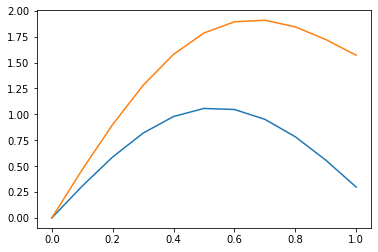

## 2. Équation elliptique

On considère l'équation elliptique suivante

\begin{equation}\label{eq:ell}
  \begin{cases}
   &-(pu')'+qu+bu'=f,\quad\text{dans}\;\Omega=(0,1),\\
   & u(0)=u(1)=0,
  \end{cases}
\end{equation}

où $p=q=b=1$ et $f(x)=1$.


**Q1)** Écrire une fonction `A(n)` retournant la matrice associée à la discretisation du problème variationnel avec les éléments finis $\mathbb{P}_1$. On rappelle que pour les éléments finis $\mathbb P_1$, les fonctions $\phi_i$ sont données par 
$$
\phi_{i}(x)= 
\begin{cases}
\dfrac{x-x_{i-1}}{x_{i}-x_{i-1}},  &  \textrm{si } x_{i-1} \le  x \le  x_{i},  \\
\dfrac{x-x_{i+1}}{x_{i}-x_{i+1}},  &  \textrm{si } x_{i} \le  x \le x_{i+1},  \\
0,  &  \textrm{sinon.}  
\end{cases}
$$

**Q2)**  Illustrer la solution pour différentes valeurs de $h$.

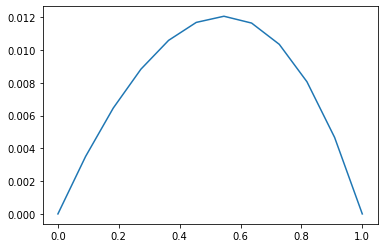

In [4]:
def A(n):
    K=-(np.diag(np.ones(n-1),1)-2*np.eye(n)+np.diag(np.ones(n-1),-1))*(n)
    M=((1/6)*np.diag(np.ones(n-1),1)+(2/3)*np.eye(n)+(1/6)*np.diag(np.ones(n-1),-1))*(1/(n))
    D=((1/2)*np.diag(np.ones(n-1),1)-(1/2)*np.diag(np.ones(n-1),-1))
    return K,M,D,K+M+D

n=10
h=1./(n+1)
x=np.linspace(0,1,n)
f=lambda x: np.ones(len(x))/(len(x))
L=A(n)[3]
u=np.linalg.solve(L,f(x)*h)
uf=np.zeros(n+2)
uf[1:-1]=u
x=np.linspace(0,1,n+2)
plt.plot(x,uf)



